# Social Media Websites Exploratory Analysis and Prediction

### Kotagiri Akanksha
 
#### Processes Involved:
##### 1. Data Collection
##### 2. Data Preprocessing
##### 3. Data Interpretation
##### 4. Data Visualizations

#### Machine Learning algorithms:
##### 1. Linear Regression
##### 2. Logistic Regression
##### 3. K-Nearest Neighbor (KNN)
##### 4. Naive Bayes classifier
##### 5. Decision Tree

#### Data Set:
##### Collected from Kaggle - Link: https://www.kaggle.com/datasets/imyjoshua/average-time-spent-by-a-user-on-social-media
##### The description for each column is as follows:
###### age: The age of the user.
###### gender: The gender identity of the user (Male, Female, Non-binary).
###### time_spent: The average time spent by users on social media
###### demographics: The type of area the user resides in (Urban, Suburban, Rural).
###### interests: The user's primary area of interest or hobby.
###### device_type: The type of device used by the user (Mobile).
###### location:The country of residence for the user.
###### platform: The social media platform where the user spends time.
###### profession: The user's occupation or professional status.
###### income: The yearly income of the user.
###### indebt: Indicates whether the user is in debt (True or False).
###### homeowner: Indicates whether the user owns a home (True or False).
###### owns_cars: Indicates whether the user owns cars (True or False).


In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
data=pd.read_csv("popularity.csv")
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9516\963369533.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


age      gender  time_spent   platform  interests        location  \
0   56        male           3  Instagram     Sports  United Kingdom   
1   46      female           2   Facebook     Travel  United Kingdom   
2   32        male           8  Instagram     Sports       Australia   
3   60  non-binary           5  Instagram     Travel  United Kingdom   
4   25        male           1  Instagram  Lifestlye       Australia   

  demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0        Urban  Software Engineer   19774    True        False     False  
1        Urban            Student   10564    True         True      True  
2    Sub_Urban   Marketer Manager   13258   False        False     False  
3        Urban            Student   12500   False         True     False  
4        Urban  Software Engineer   14566   False         True      True

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


###### The ProfileReport in Python is used for generating comprehensive data profiling reports.

In [3]:
profile=ProfileReport(data,title='Strode Prediction Profile Report',html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###### Applying the pre-processing techniques 

In [4]:
datadup=data
data.head()

age      gender  time_spent   platform  interests        location  \
0   56        male           3  Instagram     Sports  United Kingdom   
1   46      female           2   Facebook     Travel  United Kingdom   
2   32        male           8  Instagram     Sports       Australia   
3   60  non-binary           5  Instagram     Travel  United Kingdom   
4   25        male           1  Instagram  Lifestlye       Australia   

  demographics         profession  income  indebt  isHomeOwner  Owns_Car  
0        Urban  Software Engineer   19774    True        False     False  
1        Urban            Student   10564    True         True      True  
2    Sub_Urban   Marketer Manager   13258   False        False     False  
3        Urban            Student   12500   False         True     False  
4        Urban  Software Engineer   14566   False         True      True

In [5]:
data.shape

(1000, 12)

In [6]:
data.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'profession', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

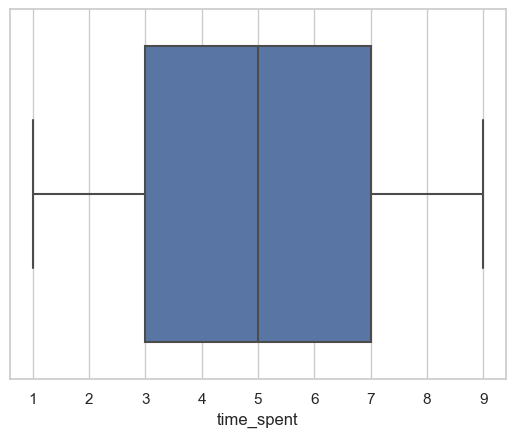

In [7]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data['time_spent'])

###### Changing data according to required analysis and Checking for any missing values or anomalies that may result in noise.

In [8]:
data['gender'] = data['gender'].astype("string")
data['platform'] = data['platform'].astype("string")
data['interests'] = data['interests'].astype("string")
data['location'] = data['location'].astype("string")
data['demographics'] = data['demographics'].astype("string")
data['profession'] = data['profession'].astype("string")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   string
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   string
 4   interests     1000 non-null   string
 5   location      1000 non-null   string
 6   demographics  1000 non-null   string
 7   profession    1000 non-null   string
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), string(6)
memory usage: 73.4 KB


In [10]:
data['profession'] = data['profession'].replace({'Marketer Manager': 'IT professional','Software Engineer':'IT professional'})
data.rename(columns={'profession':'working_status'},inplace=True)

In [11]:
data.describe()

age   time_spent        income
count  1000.000000  1000.000000   1000.000000
mean     40.986000     5.029000  15014.823000
std      13.497852     2.537834   2958.628221
min      18.000000     1.000000  10012.000000
25%      29.000000     3.000000  12402.250000
50%      42.000000     5.000000  14904.500000
75%      52.000000     7.000000  17674.250000
max      64.000000     9.000000  19980.000000

In [12]:
pd.isnull(data)

age  gender  time_spent  platform  interests  location  demographics  \
0    False   False       False     False      False     False         False   
1    False   False       False     False      False     False         False   
2    False   False       False     False      False     False         False   
3    False   False       False     False      False     False         False   
4    False   False       False     False      False     False         False   
..     ...     ...         ...       ...        ...       ...           ...   
995  False   False       False     False      False     False         False   
996  False   False       False     False      False     False         False   
997  False   False       False     False      False     False         False   
998  False   False       False     False      False     False         False   
999  False   False       False     False      False     False         False   

     working_status  income  indebt  isHomeOwner  Owns_Car  
0             False   False   False        False     False  
1             False   False   False        False     False  
2             False   False   False        False     False  
3             False   False   False        False     False  
4             False   False   False        False     False  
..              ...     ...     ...          ...       ...  
995           False   False   False        False     False  
996           False   False   False        False     False  
997           False   False   False        False     False  
998           False   False   False        False     False  
999           False   False   False        False     False  

[1000 rows x 12 columns]

In [13]:
pd.isnull(data).sum()

age               0
gender            0
time_spent        0
platform          0
interests         0
location          0
demographics      0
working_status    0
income            0
indebt            0
isHomeOwner       0
Owns_Car          0
dtype: int64

##### Gaining insights through adding a new column as Value_Score and performing data Interpretation and visualization techniques for analysis

In [14]:
data['Value_Score'] = data['income'] / (data['age'] * data['time_spent'])
data.head()

age      gender  time_spent   platform  interests        location  \
0   56        male           3  Instagram     Sports  United Kingdom   
1   46      female           2   Facebook     Travel  United Kingdom   
2   32        male           8  Instagram     Sports       Australia   
3   60  non-binary           5  Instagram     Travel  United Kingdom   
4   25        male           1  Instagram  Lifestlye       Australia   

  demographics   working_status  income  indebt  isHomeOwner  Owns_Car  \
0        Urban  IT professional   19774    True        False     False   
1        Urban          Student   10564    True         True      True   
2    Sub_Urban  IT professional   13258   False        False     False   
3        Urban          Student   12500   False         True     False   
4        Urban  IT professional   14566   False         True      True   

   Value_Score  
0   117.702381  
1   114.826087  
2    51.789062  
3    41.666667  
4   582.640000

In [15]:
grouped_data_platform = data.groupby('platform').sum()
result_platform = grouped_data_platform[['time_spent', 'Value_Score']]
grouped_data_interests = data.groupby('interests').sum()
result_interests = grouped_data_interests[['time_spent', 'Value_Score']]
print(result_platform)
print(result_interests)

           time_spent   Value_Score
platform                           
Facebook         1552  36977.808601
Instagram        1870  44651.535987
YouTube          1607  42879.189264
           time_spent   Value_Score
interests                          
Lifestlye        1754  42047.058289
Sports           1604  42728.599675
Travel           1671  39732.875889


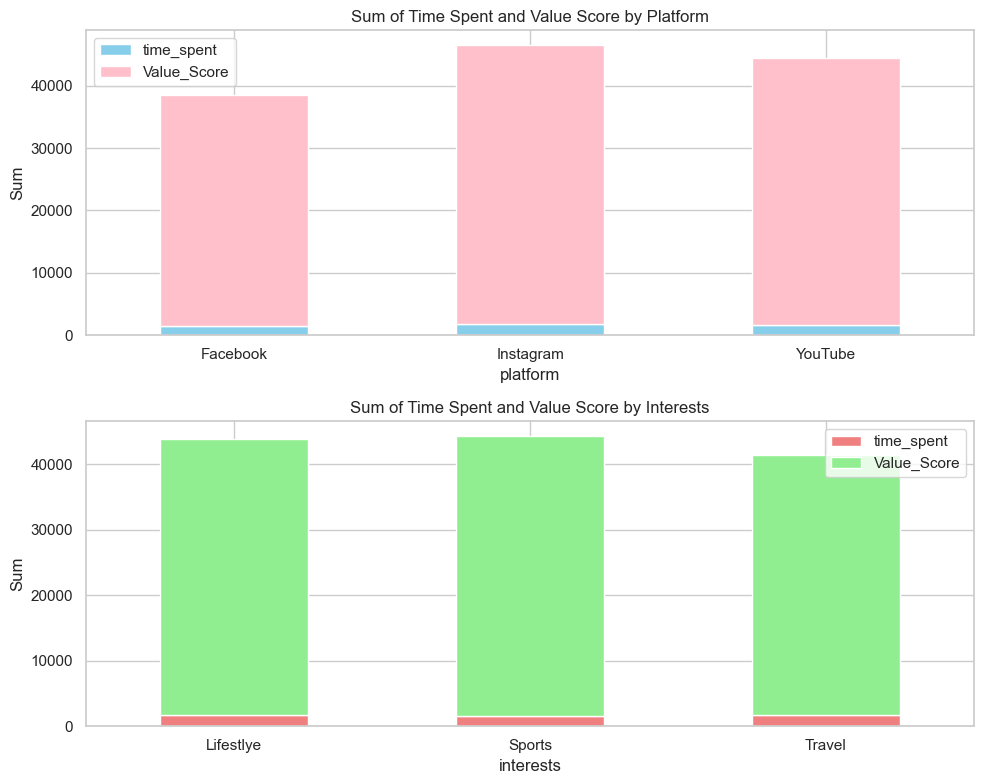

In [16]:
platform_colors = ['skyblue', 'pink']
interests_colors = ['lightcoral', 'lightgreen']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
grouped_data_platform[['time_spent', 'Value_Score']].plot(kind='bar', stacked=True, ax=axes[0], rot=0,color=platform_colors)
axes[0].set_title('Sum of Time Spent and Value Score by Platform')
axes[0].set_ylabel('Sum')
grouped_data_interests[['time_spent', 'Value_Score']].plot(kind='bar',stacked=True, ax=axes[1], rot=0,color=interests_colors)
axes[1].set_title('Sum of Time Spent and Value Score by Interests')
axes[1].set_ylabel('Sum')
plt.tight_layout()
plt.show()

In [17]:
grouped_data_demograph = data.groupby('demographics').sum()
grouped_data_location = data.groupby('location').sum()
result_Finance = grouped_data_demograph[['time_spent', 'isHomeOwner', 'Owns_Car']]
result_place = grouped_data_location[['time_spent', 'isHomeOwner', 'Owns_Car']]
print(result_Finance)
print(result_place)

              time_spent  isHomeOwner  Owns_Car
demographics                                   
Rural               1707          176       199
Sub_Urban           1766          173       171
Urban               1556          159       169
                time_spent  isHomeOwner  Owns_Car
location                                         
Australia             1837          177       197
United Kingdom        1615          175       184
United States         1577          156       158


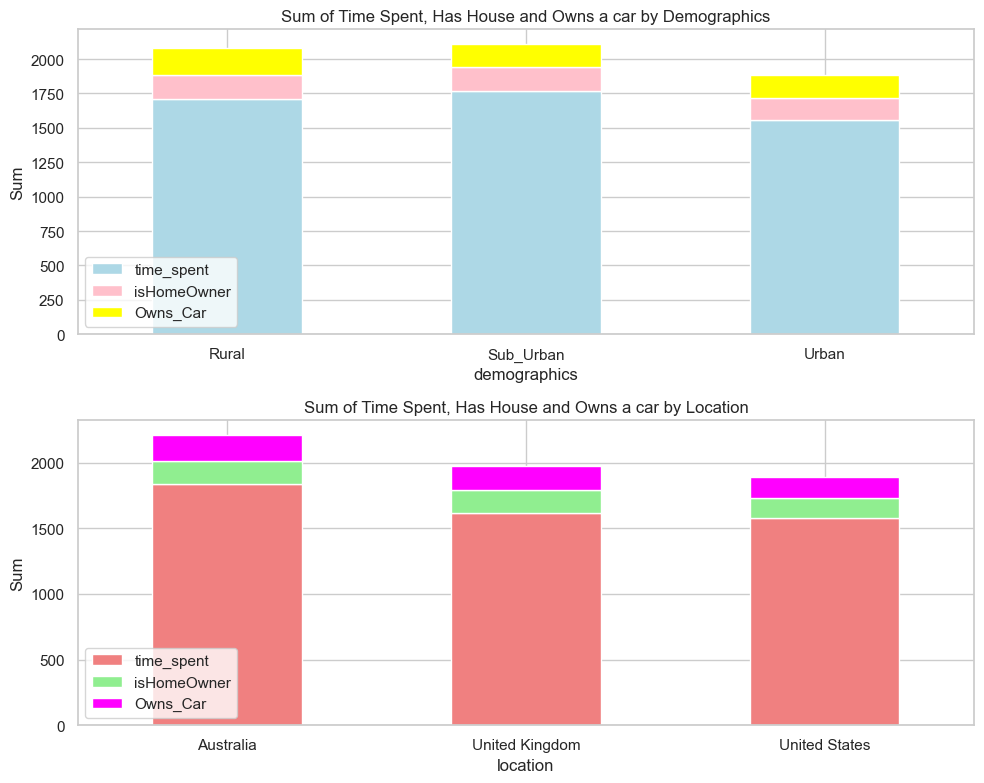

In [18]:
platform_colors = ['lightblue', 'pink', 'yellow']
interests_colors = ['lightcoral', 'lightgreen', 'magenta']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
result_Finance.plot(kind='bar', stacked=True, ax=axes[0], rot=0, color=platform_colors)
axes[0].set_title('Sum of Time Spent, Has House and Owns a car by Demographics')
axes[0].set_ylabel('Sum')
result_place.plot(kind='bar', stacked=True, ax=axes[1], rot=0, color=interests_colors)
axes[1].set_title('Sum of Time Spent, Has House and Owns a car by Location')
axes[1].set_ylabel('Sum')
plt.tight_layout()
plt.show()

In [19]:
data.drop(columns=['Value_Score'], inplace=True)
data.head()

age      gender  time_spent   platform  interests        location  \
0   56        male           3  Instagram     Sports  United Kingdom   
1   46      female           2   Facebook     Travel  United Kingdom   
2   32        male           8  Instagram     Sports       Australia   
3   60  non-binary           5  Instagram     Travel  United Kingdom   
4   25        male           1  Instagram  Lifestlye       Australia   

  demographics   working_status  income  indebt  isHomeOwner  Owns_Car  
0        Urban  IT professional   19774    True        False     False  
1        Urban          Student   10564    True         True      True  
2    Sub_Urban  IT professional   13258   False        False     False  
3        Urban          Student   12500   False         True     False  
4        Urban  IT professional   14566   False         True      True

In [20]:
Gender = {'male': 1, 'female': 2, 'non-binary': 3}
data['gender'] = data['gender'].map(Gender)
Platform = {'Instagram': 1, 'Facebook': 2, 'YouTube': 3}
data['platform'] = data['platform'].map(Platform)
Interest = {'Sports': 1, 'Travel': 2, 'Lifestlye': 3} 
data['interests'] = data['interests'].map(Interest)
loc={'United Kingdom':1,'Australia':2,'United States':3}
data['location']=data['location'].map(loc)
dem = {'Urban': 1, 'Sub_Urban': 2, 'Rural': 3}
data['demographics'] = data['demographics'].map(dem)
working = {'IT professional': 1, 'Student': 2}
data['working_status'] = data['working_status'].map(working)
data['indebt'] = data['indebt'].astype(int)
data['isHomeOwner'] = data['isHomeOwner'].astype(int)
data['Owns_Car'] = data['Owns_Car'].astype(int)

In [21]:
data.head()

age  gender  time_spent  platform  interests  location  demographics  \
0   56       1           3         1          1         1             1   
1   46       2           2         2          2         1             1   
2   32       1           8         1          1         2             2   
3   60       3           5         1          2         1             1   
4   25       1           1         1          3         2             1   

   working_status  income  indebt  isHomeOwner  Owns_Car  
0               1   19774       1            0         0  
1               2   10564       1            1         1  
2               1   13258       0            0         0  
3               2   12500       0            1         0  
4               1   14566       0            1         1

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1000 non-null   int64
 1   gender          1000 non-null   int64
 2   time_spent      1000 non-null   int64
 3   platform        1000 non-null   int64
 4   interests       1000 non-null   int64
 5   location        1000 non-null   int64
 6   demographics    1000 non-null   int64
 7   working_status  1000 non-null   int64
 8   income          1000 non-null   int64
 9   indebt          1000 non-null   int32
 10  isHomeOwner     1000 non-null   int32
 11  Owns_Car        1000 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 82.2 KB


In [23]:
profile=ProfileReport(data,title='Popular Social Media WebSites Profile Report',html={'style':{'full_width':True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Visualizations

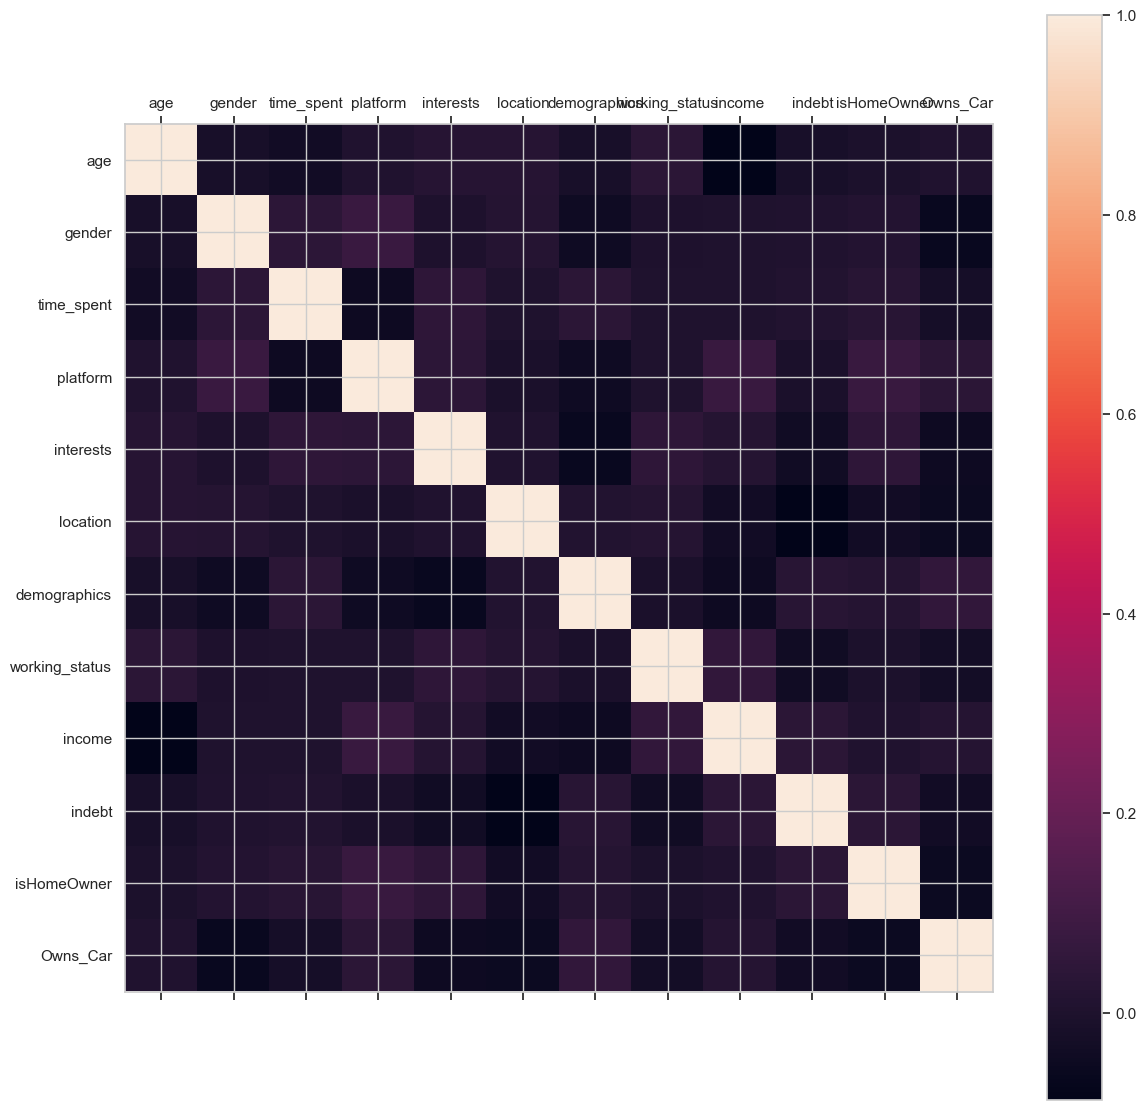

In [24]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(datadup.corr())
plt.yticks(np.arange(datadup.shape[1]), datadup.columns)
plt.xticks(np.arange(datadup.shape[1]), datadup.columns)
plt.colorbar()

<Figure size 2000x1400 with 0 Axes>

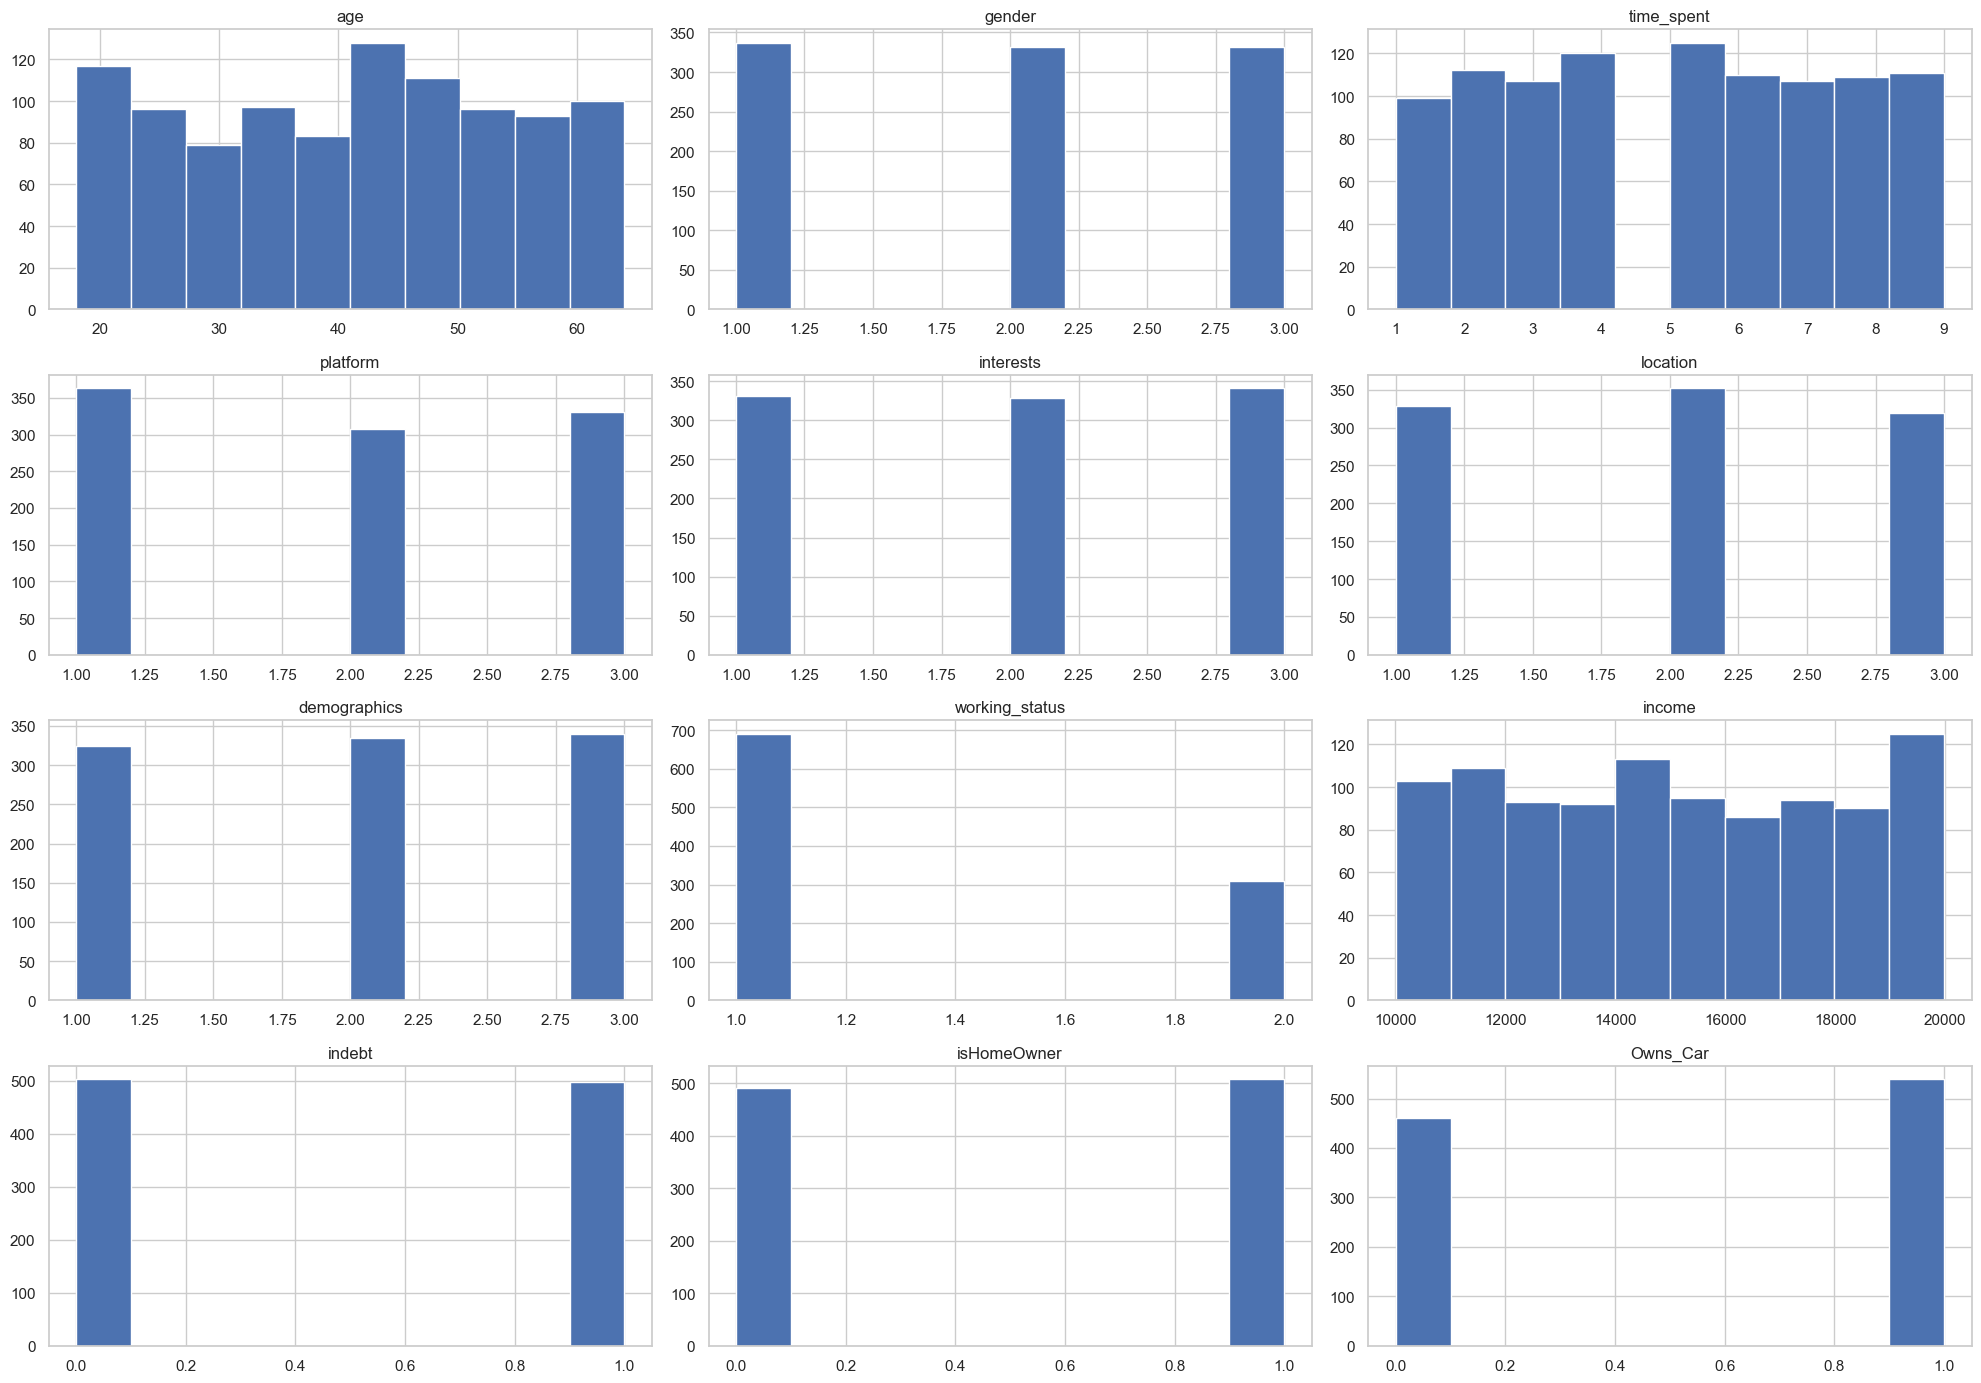

In [25]:
plt.figure(figsize=(20, 14))  # Adjust the values (width, height) as needed
data.hist()
plt.tight_layout()  # Ensures tight layout to prevent overlapping
plt.show()

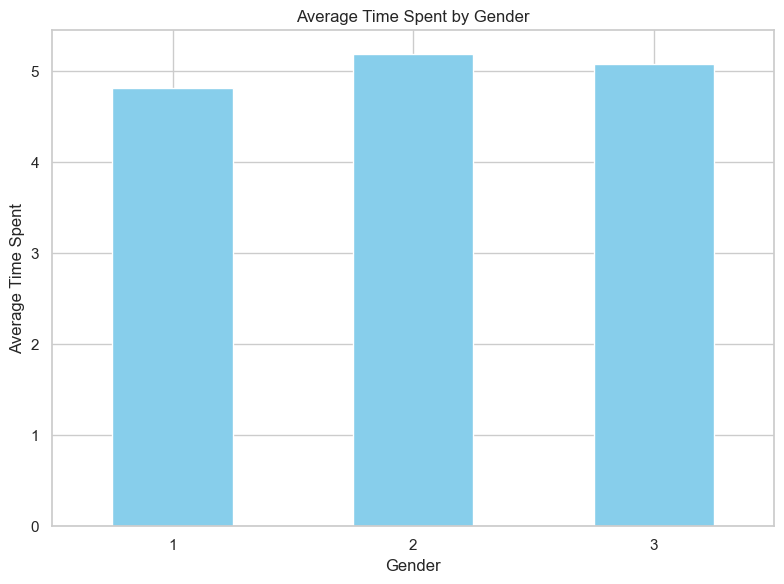

In [26]:
gender_time_mean = datadup.groupby('gender')['time_spent'].mean()
plt.figure(figsize=(8, 6))
gender_time_mean.plot(kind='bar', color='skyblue')
plt.title('Average Time Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Time Spent')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: xlabel='time_spent', ylabel='count'>

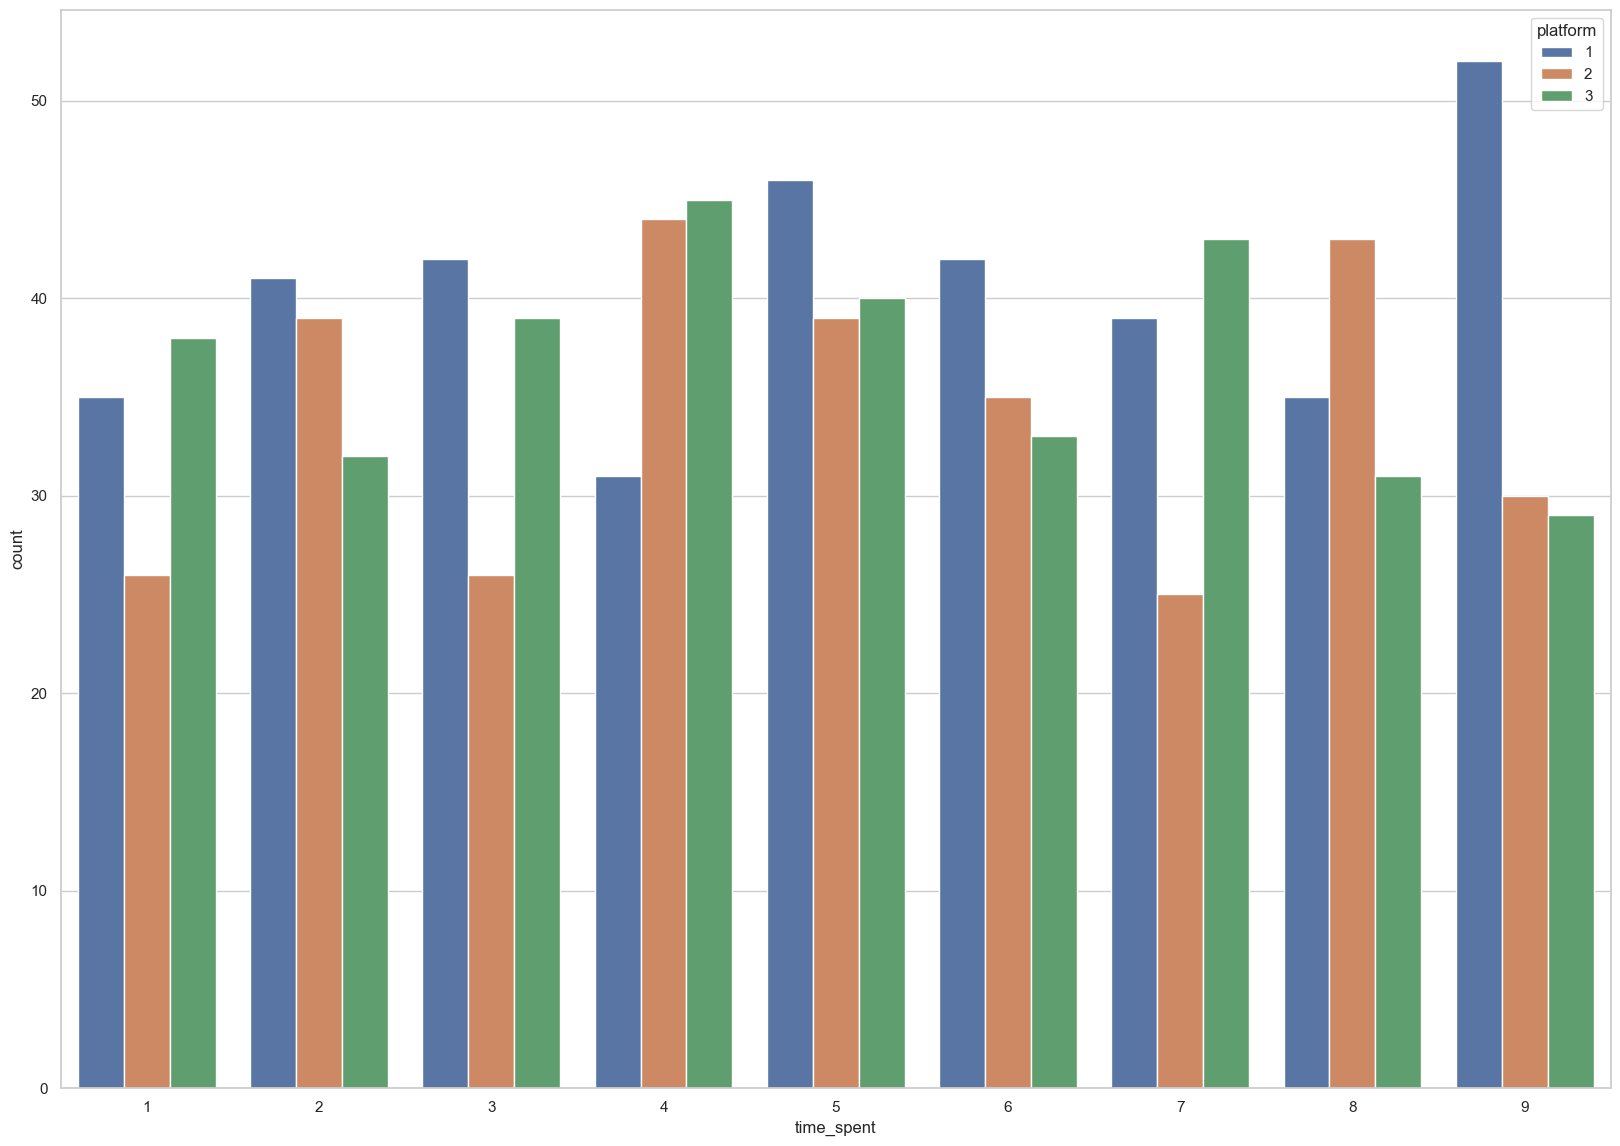

In [27]:
data1=data
sns.countplot(x="time_spent",data=data1,hue='platform')

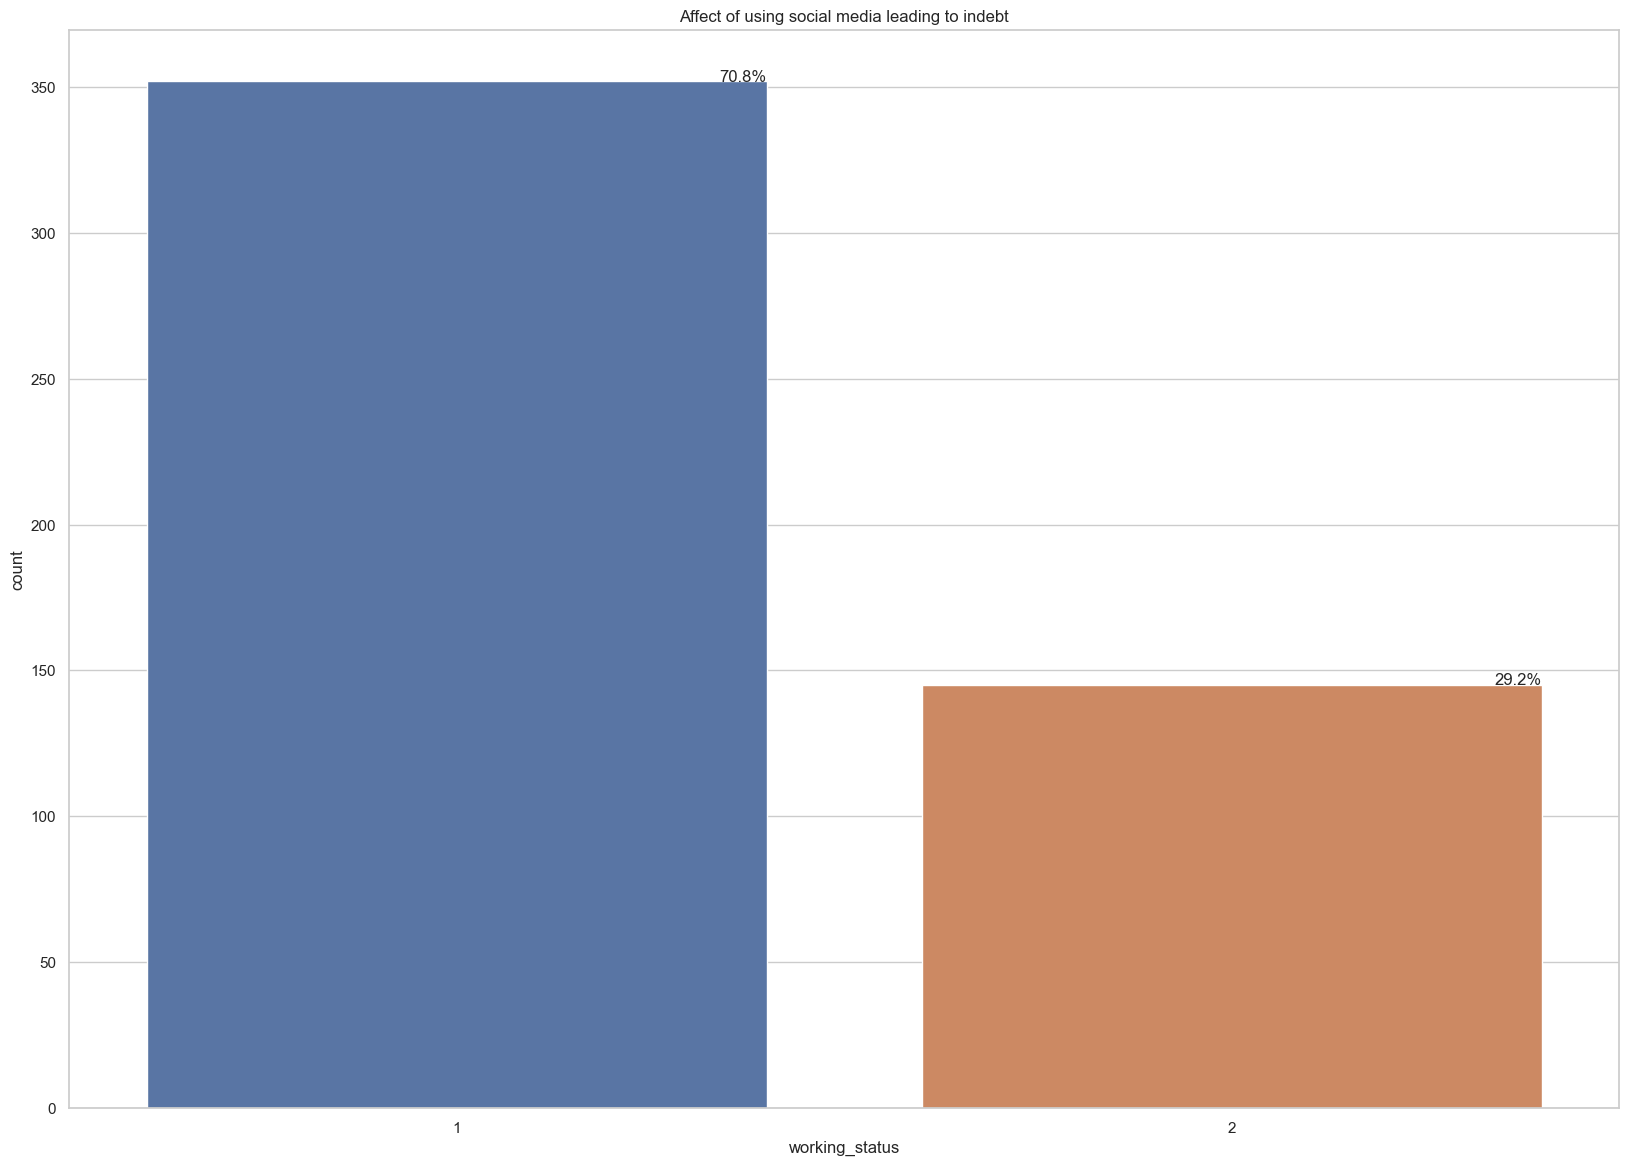

In [28]:
ax=sns.countplot(x='working_status',data=data1[data1['indebt']==1])
plt.title("Affect of using social media leading to indebt")
total_1 =float(len(data1[data1['indebt']==1]))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_1)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

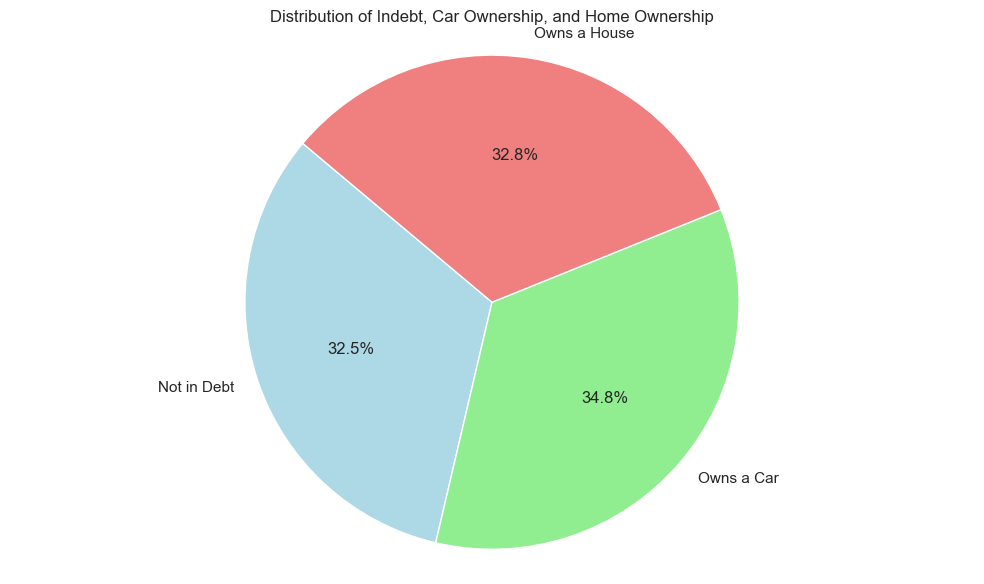

In [29]:
counts = [len(data[data['indebt'] == 0]),
          len(data[data['Owns_Car'] == 1]),
          len(data[data['isHomeOwner'] == 1])]
labels = ['Not in Debt', 'Owns a Car', 'Owns a House']
colors = ['lightblue', 'lightgreen', 'lightcoral']
plt.figure(figsize=(10, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Indebt, Car Ownership, and Home Ownership')
plt.axis('equal') 
plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\HP\AppData\Local\Temp\ipykernel_9516\4036421107.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

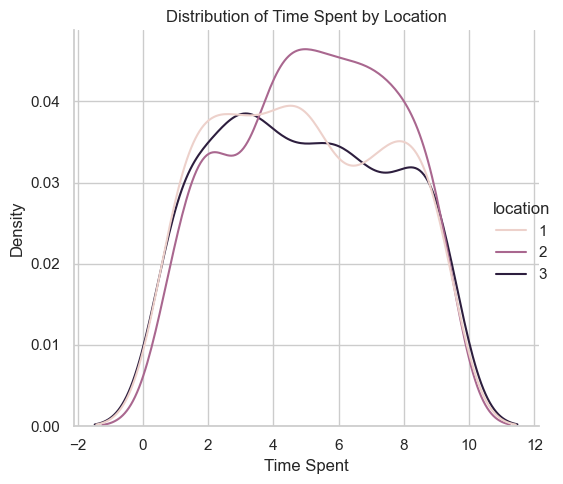

In [30]:
plt.figure(figsize=(10, 6))
sns.displot(data=data, x='time_spent', hue='location', kind='kde', fill=False)
plt.title('Distribution of Time Spent by Location')
plt.xlabel('Time Spent')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

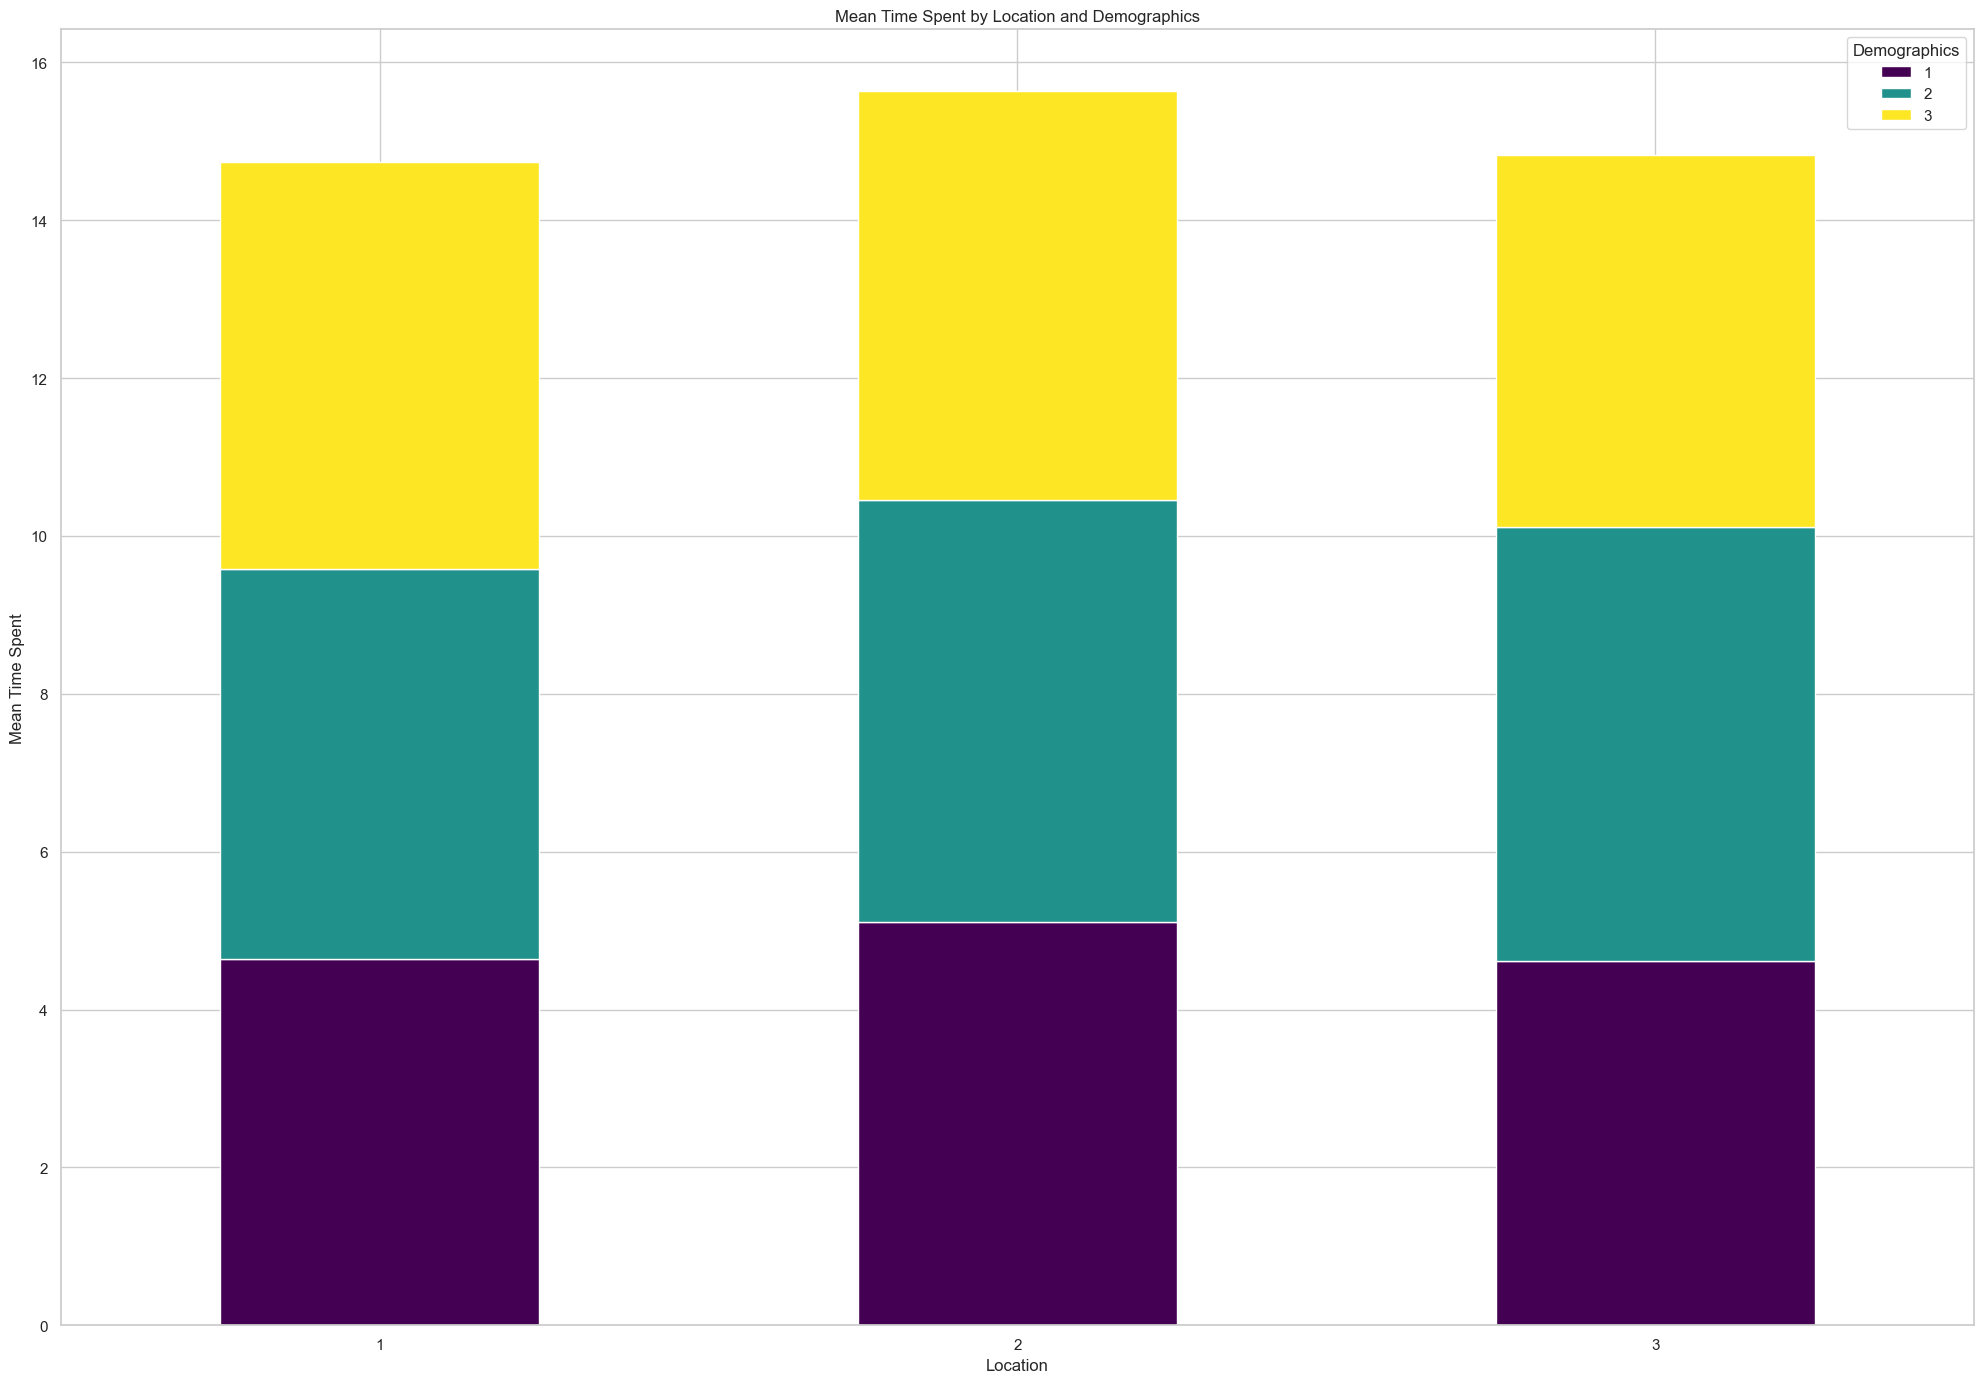

In [31]:
mean_time_spent = data.groupby('location')['time_spent'].mean().reset_index()
pivot_data = data.pivot_table(index='location', columns='demographics', values='time_spent', aggfunc='mean')
plt.figure(figsize=(10, 6))
pivot_data.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Mean Time Spent by Location and Demographics')
plt.xlabel('Location')
plt.ylabel('Mean Time Spent')
plt.xticks(rotation=0)
plt.legend(title='Demographics')
plt.tight_layout()
plt.show()

## ML Algorithms


### Linear Regression


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [33]:
selected_col = ['age', 'time_spent', 'working_status', 'income', 'indebt']
data_subset = data[selected_col]

In [34]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['working_status']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_subset[col] = label_encoders[col].fit_transform(data_subset[col])

# Split the data into features and target variable
X = data_subset.drop('indebt', axis=1)
y = data_subset['indebt']

C:\Users\HP\AppData\Local\Temp\ipykernel_9516\499100477.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = label_encoders[col].fit_transform(data_subset[col])


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     age  time_spent  working_status  income
29    44           5               0   13117
535   38           9               1   18808
695   45           7               0   15021
557   47           7               1   14868
836   46           3               0   19455
..   ...         ...             ...     ...
106   52           8               0   14507
270   26           1               1   10681
860   64           8               0   19551
435   26           2               0   11524
102   28           2               0   10838

[800 rows x 4 columns]
     age  time_spent  working_status  income
521   25           4               0   15188
737   38           8               0   15330
740   34           3               1   13771
660   38           8               0   14924
411   61           2               0   14753
..   ...         ...             ...     ...
408   54           2               1   16789
332   34           5               0   19669
208   40           1           

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)
print(y_pred)

[0.5070896  0.51869402 0.46800811 0.516683   0.45886416 0.47442445
 0.49570158 0.49678612 0.51794804 0.49613945 0.49233103 0.49365349
 0.50978989 0.50488345 0.4778671  0.47671259 0.45404551 0.49747694
 0.53793822 0.4965134  0.53055937 0.50811024 0.4561186  0.47389632
 0.5031465  0.47875827 0.52688581 0.45554493 0.4727254  0.48075333
 0.47340352 0.46391636 0.49198717 0.49667775 0.49107111 0.47766386
 0.5075111  0.52587214 0.54046925 0.48929    0.51655159 0.49729318
 0.48149408 0.46293443 0.4827663  0.54223902 0.46783306 0.48288624
 0.46199795 0.51408978 0.50023561 0.47963513 0.51998732 0.50450621
 0.48238086 0.45201185 0.49801349 0.50958074 0.46886628 0.48197316
 0.50845153 0.50818733 0.47177067 0.46497864 0.50245736 0.4937047
 0.50714087 0.44177752 0.49256558 0.48547221 0.47257096 0.49408924
 0.47547279 0.52653945 0.47959514 0.52290702 0.49291859 0.51832289
 0.48850218 0.53358814 0.52781467 0.45012746 0.47223778 0.49371385
 0.52864772 0.46654968 0.47805615 0.46677893 0.4931136  0.47082

In [38]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.4996504617084399
Mean Squared Error: 0.2504213743655132
Root Mean Squared Error: 0.5004211969586353


#### For linear regression, you don't calculate accuracy scores and classification reports as you would with classification algorithms like logistic regression. Linear regression predicts continuous values rather than discrete classes. Instead, you evaluate the performance of the linear regression model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)

### Logistic Regression


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [40]:
dataml1=data
dataml1.shape

(1000, 12)

In [41]:
data.columns

Index(['age', 'gender', 'time_spent', 'platform', 'interests', 'location',
       'demographics', 'working_status', 'income', 'indebt', 'isHomeOwner',
       'Owns_Car'],
      dtype='object')

In [42]:
# Selecting only the specified columns
selected_columns = ['age', 'time_spent', 'working_status', 'income', 'indebt']
data_subset = data[selected_columns]

In [43]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['working_status']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_subset[col] = label_encoders[col].fit_transform(data_subset[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_9516\250946809.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = label_encoders[col].fit_transform(data_subset[col])


In [44]:
# Split the data into features and target variable
X = data_subset.drop('indebt', axis=1)
y = data_subset['indebt']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     age  time_spent  working_status  income
29    44           5               0   13117
535   38           9               1   18808
695   45           7               0   15021
557   47           7               1   14868
836   46           3               0   19455
..   ...         ...             ...     ...
106   52           8               0   14507
270   26           1               1   10681
860   64           8               0   19551
435   26           2               0   11524
102   28           2               0   10838

[800 rows x 4 columns]
     age  time_spent  working_status  income
521   25           4               0   15188
737   38           8               0   15330
740   34           3               1   13771
660   38           8               0   14924
411   61           2               0   14753
..   ...         ...             ...     ...
408   54           2               1   16789
332   34           5               0   19669
208   40           1           

In [46]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [47]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.55
Mean Squared Error: 0.55
Root Mean Squared Error: 0.7416198487095663


In [48]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)

Accuracy: 45.0


In [49]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.51      0.47        96
           1       0.47      0.39      0.43       104

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



### KNN


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [51]:
# Selecting only the specified columns
selected_columns = ['age', 'time_spent', 'working_status', 'income', 'indebt']
data_subset = data[selected_columns]

In [52]:
label_encoders = {}
categorical_columns = ['working_status']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_subset[col] = label_encoders[col].fit_transform(data_subset[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_9516\3761298731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = label_encoders[col].fit_transform(data_subset[col])


In [53]:
X = data_subset.drop('indebt', axis=1)
y = data_subset['indebt']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     age  time_spent  working_status  income
29    44           5               0   13117
535   38           9               1   18808
695   45           7               0   15021
557   47           7               1   14868
836   46           3               0   19455
..   ...         ...             ...     ...
106   52           8               0   14507
270   26           1               1   10681
860   64           8               0   19551
435   26           2               0   11524
102   28           2               0   10838

[800 rows x 4 columns]
     age  time_spent  working_status  income
521   25           4               0   15188
737   38           8               0   15330
740   34           3               1   13771
660   38           8               0   14924
411   61           2               0   14753
..   ...         ...             ...     ...
408   54           2               1   16789
332   34           5               0   19669
208   40           1           

In [55]:
# Train the KNN classifier
k = 3  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.52


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49        96
           1       0.54      0.56      0.55       104

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200



### Naive Bayes Classifier

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [59]:
# Selecting only the specified columns
selected_columns = ['age', 'time_spent', 'working_status', 'income', 'indebt']
data_subset = data[selected_columns]

In [60]:
label_encoders = {}
categorical_columns = ['working_status']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_subset[col] = label_encoders[col].fit_transform(data_subset[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_9516\3761298731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = label_encoders[col].fit_transform(data_subset[col])


In [61]:
X = data_subset.drop('indebt', axis=1)
y = data_subset['indebt']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     age  time_spent  working_status  income
29    44           5               0   13117
535   38           9               1   18808
695   45           7               0   15021
557   47           7               1   14868
836   46           3               0   19455
..   ...         ...             ...     ...
106   52           8               0   14507
270   26           1               1   10681
860   64           8               0   19551
435   26           2               0   11524
102   28           2               0   10838

[800 rows x 4 columns]
     age  time_spent  working_status  income
521   25           4               0   15188
737   38           8               0   15330
740   34           3               1   13771
660   38           8               0   14924
411   61           2               0   14753
..   ...         ...             ...     ...
408   54           2               1   16789
332   34           5               0   19669
208   40           1           

In [63]:
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.505


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.55      0.52        96
           1       0.53      0.46      0.49       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.50       200



###  Decision Tree

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [67]:
# Selecting only the specified columns
selected_columns = ['age', 'time_spent', 'working_status', 'income', 'indebt']
data_subset = data[selected_columns]

In [68]:
label_encoders = {}
categorical_columns = ['working_status']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_subset[col] = label_encoders[col].fit_transform(data_subset[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_9516\3761298731.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset[col] = label_encoders[col].fit_transform(data_subset[col])


In [69]:
X = data_subset.drop('indebt', axis=1)
y = data_subset['indebt']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     age  time_spent  working_status  income
29    44           5               0   13117
535   38           9               1   18808
695   45           7               0   15021
557   47           7               1   14868
836   46           3               0   19455
..   ...         ...             ...     ...
106   52           8               0   14507
270   26           1               1   10681
860   64           8               0   19551
435   26           2               0   11524
102   28           2               0   10838

[800 rows x 4 columns]
     age  time_spent  working_status  income
521   25           4               0   15188
737   38           8               0   15330
740   34           3               1   13771
660   38           8               0   14924
411   61           2               0   14753
..   ...         ...             ...     ...
408   54           2               1   16789
332   34           5               0   19669
208   40           1           

In [71]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.51


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.48      0.48        96
           1       0.53      0.54      0.53       104

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



###### In conclusion, this research project has provided valuable insights into user behaviors related to indebtedness on social media platforms. Through the application of machine learning algorithms and analysis of a comprehensive dataset,gained a deeper understanding of the factors influencing user indebtedness and its implications in the digital age.